<a href="https://colab.research.google.com/github/rudrakshrajvyas/VAFSUD/blob/main/FM_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
nYear = 9
n = nYear +1
sales0 = 40 #Expected value of sales for 2020 i.e. t=1
salesgrowth0=0.075 #Expected Sales growth rate
gross_profit_margin=0.3 #Expected COGS and operating expenses as a % of sales
capex0=12#Expected value of CAPEX at t=0
nwc0= 4.5
taxrate =0.26 #Expected tax rate is 25%
discountrate = 0.2 #Expected discount rate is 10%
gcapex= 0.25 #Expected Growth in Capex
gnwc = 0.1
dep_rate = 0.20
cost_of_debt = 0.085
operating_expenses_ratio = 0.20

In [ ]:
#Solving for Base Case scenario
# Sales Calculation
sales = list(range(n))
sales[0]=0
for i in sp.arange(nYear):
  sales[1] = sales0
  sales[i+1]=(1+salesgrowth0)*sales[i]
print("Sales Revenue", sales[:n])

# COGS and Operating Expenses Calculation
COGS = sp.ones(n)*(1-gross_profit_margin)*sales
operating_expenses = sp.ones(n)*operating_expenses_ratio*sales[0:n]
print("COGS", COGS[:n])
print("Operating expenses", operating_expenses[:n])

# Gross PPE and Net Working Capital Calculation
grossppe = sp.ones(n)
grossppe[0]=capex0
wc = sp.ones(n)
wc[0]=nwc0
for i in sp.arange(nYear-1):
  grossppe[i+1]=grossppe[i]+gcapex*(sales[i+2]-sales[i+1])
  wc[i+1]=wc[i]+gnwc*(sales[i+2]-sales[i+1])

grossppe[nYear]=grossppe[nYear-1]
print("Gross PPE", grossppe[0:n])
wc[nYear]=wc[nYear-1]
print("Net Working Capital", wc[0:n])

# Depreciation, Net PPE ,Accumulated Depreciation Calculation
depreciation = sp.zeros(n)
acc_depreciation = sp.zeros(n)
net_ppe = sp.zeros(n)
net_ppe[0] = capex0
for i in sp.arange(1,n):
  depreciation[i] = dep_rate * net_ppe[i-1]
  acc_depreciation[i] = acc_depreciation[i-1] + depreciation[i]
  net_ppe[i] = grossppe[i]-acc_depreciation[i]
print("Depreciation",depreciation[:n])
print("Accumulated_Depreciation",acc_depreciation[:n])
print("Net PPE",net_ppe[:n])


# EBIT Projection
gross_profit = sales - COGS
EBITDA = gross_profit - operating_expenses
print("EBITDA",EBITDA[:n])
EBIT = EBITDA - depreciation
print("EBIT",EBIT[:n])



# Capex Projections
change_in_capex = sp.zeros(n)
change_in_capex[0] = grossppe[0]
change_in_nwc = sp.zeros(n)
change_in_nwc[0] =  wc[0]
for i in sp.arange(1,nYear):
  change_in_capex[i] = grossppe[i]-grossppe[i-1]
  change_in_nwc[i] = wc[i]-wc[i-1]
print("CAPEX", change_in_capex[:n])
print("Change in Net Working Capital", change_in_nwc[:n])


# Salvage Value 
salvage_value = sp.zeros(n)
salvage_value[nYear] = net_ppe[nYear] + wc[nYear]
print("Salvage Value",salvage_value[:n])


# FCFE Calculation
FCFF = netprofit + depreciation - change_in_capex-change_in_nwc+np_p + salvage_value
print("FCFF", FCFF[:n])
NPVproject =sp.npv(discountrate,FCFF)
IRRproject = sp.irr(FCFF)
print("Expected NPV", NPVproject)
print("Expected IRR", IRRproject)

Sales Revenue [0, 40, 43.0, 46.225, 49.691874999999996, 53.41876562499999, 57.42517304687499, 61.73206102539061, 66.3619656022949, 71.33911302246702]
COGS [ 0.         28.         30.1        32.3575     34.7843125  37.39313594
 40.19762113 43.21244272 46.45337592 49.93737912]
Operating expenses [ 0.          8.          8.6         9.245       9.938375   10.68375312
 11.48503461 12.34641221 13.27239312 14.2678226 ]
Gross PPE [12.         12.75       13.55625    14.42296875 15.35469141 16.35629326
 17.43301526 18.5904914  19.83477826 19.83477826]
Net Working Capital [4.5        4.8        5.1225     5.4691875  5.84187656 6.2425173
 6.6732061  7.13619656 7.6339113  7.6339113 ]
Depreciation [0.         2.4        2.07       1.81725    1.62714375 1.48805953
 1.390768   1.3279588  1.29386227 1.28394718]
Accumulated_Depreciation [ 0.          2.4         4.47        6.28725     7.91439375  9.40245328
 10.79322128 12.12118007 13.41504234 14.69898952]
Net PPE [12.         10.35        9.08625

NameError: ignored

II. Monte Carlo Simulation for Capital Budgeting

In [ ]:
nYear = 9
n = nYear +1
sp.random.seed(123)
nSimulation = 100 #No. of simulations
n2 = nSimulation #For ease of writing
sales0 = sp.random.normal(loc=40,scale=10,size=n2)
salesgrowth0 = sp.random.normal(loc=7.5,scale=3,size=n2)
gross_profit_margin = sp.random.uniform(low=0.15,high=0.45,size=n2)
capex0=sp.random.uniform(low=10,high=14,size=n2)
nwc0= sp.random.uniform(low=3,high=6,size=n2)
taxrate =0.26
discountrate = sp.random.triangular(left=0.15, mode=0.20, right=0.25,size=n2)
gcapex= sp.random.uniform(low=0.15,high=0.45,size=n2)
gnwc = sp.random.uniform(low=0.05,high=0.15,size=n2)
dep_rate = 0.20
cost_of_debt = 0.085
operating_expenses_ratio = sp.random.triangular(left=0.1, mode=0.2, right=0.3,size=n2)

NPV [-75508238.90327701, 801.5979486116321, 38568002.77188885, -4147412696.7958965, -11094395.216114163, 15010640.106149018, -15479525.617398188, 772.1957991475574, -151523108.8372884, -27437.24013732854, 473987.072854355, -393152735.9965844, -5125707.685313489, -31705206.695325285, 79637814.60086942, -29641485.396176994, 94018.16596892674, 2653714.2454017997, -1469649272.8461695, -843.9000747536752, 2367124.303177707, -4506060.528853431, -58299922.319763824, 132385397.31652129, 141183630.77217102, 1777416.3210419044, -438515700.79789925, -105521469.1920115, -21448110.25545919, -10292968.066553002, 478323.7600674827, -245146.13544377126, -482732.61631316366, -81804658.1052315, -370240501.5100838, -47598075.99804258, -5068538.954300858, -814018295.1964273, -134491073.18389964, -2700874.1529414617, -2784123.8208973985, -11683784.501827195, 127629451.9291501, -58235446.56075442, -67903564.5282954, -7595656.415414669, -55881729.490351915, -1228779135.8879886, -4627390.199352324, -66916492.

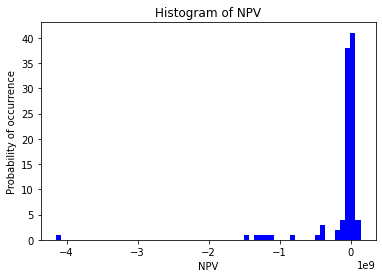

In [ ]:
# Running Monte Carlo Simulations

npv=[]
irr=[]
for j in sp.arange(nSimulation):
  sales = list(range(n))
  sales[0]=0
  for i in sp.arange(nYear):
    sales[1] = sales0[j]
    sales[i+1]=(1+salesgrowth0[j])*sales[i]

  # COGS and Operating Expenses Calculation
  COGS = sp.ones(n)*(1-gross_profit_margin[j])*sales
  operating_expenses = sp.ones(n)*operating_expenses_ratio[j]*sales[0:n]

  # Gross PPE and Net Working Capital Calculation
  grossppe = sp.ones(n)
  grossppe[0]=capex0[j]
  wc = sp.ones(n)
  wc[0]=nwc0[j]
  for i in sp.arange(nYear-1):
    grossppe[i+1]=grossppe[i]+gcapex[j]*(sales[i+2]-sales[i+1])
    wc[i+1]=wc[i]+gnwc[j]*(sales[i+2]-sales[i+1])
  grossppe[nYear]=grossppe[nYear-1]
  wc[nYear]=wc[nYear-1]

  # Depreciation, Net PPE ,Accumulated Depreciation Calculation
  depreciation = sp.zeros(n)
  acc_depreciation = sp.zeros(n)
  net_ppe = sp.zeros(n)
  net_ppe[0] = capex0[j]
  for i in sp.arange(1,n):
    depreciation[i] = dep_rate * net_ppe[i-1]
    acc_depreciation[i] = acc_depreciation[i-1] + depreciation[i]
    net_ppe[i] = grossppe[i]-acc_depreciation[i]


  # EBIT Projection
  gross_profit = sales - COGS
  EBITDA = gross_profit - operating_expenses
  EBIT = EBITDA - depreciation


  # Net Profit Projections
  EBT = EBIT - int_expense
  netprofit=EBT*(1-taxrate)

  # Capex Projections
  change_in_capex = sp.zeros(n)
  change_in_capex[0] = grossppe[0]
  change_in_nwc = sp.zeros(n)
  change_in_nwc[0] =  wc[0]
  for i in sp.arange(1,nYear):
    change_in_capex[i] = grossppe[i]-grossppe[i-1]
    change_in_nwc[i] = wc[i]-wc[i-1]

 

  # Salvage Value 
  salvage_value = sp.zeros(n)
  salvage_value[nYear] = net_ppe[nYear] + wc[nYear]

  # FCFE Calculation
  FCFF = netprofit + depreciation - change_in_capex-change_in_nwc+np_p + salvage_value
  # print("FCFF", FCFF[:n])
  NPVproject =sp.npv(discountrate[j],FCFF)
  IRRproject = sp.irr(FCFF)
  npv.append(NPVproject)
  irr.append(IRRproject) 
print("NPV",npv)     
print("Mean NPV", round(sp.mean(npv),0)) 
print("Standard deviation NPV", sp.std(npv)) 
print("50th percentile NPV", round(sp.percentile(npv,50),0))
for i in range(10,100,10):
  print("percentile", i)
  print(round(sp.percentile(npv,i),2))
plt.hist(npv,60,facecolor='blue',align='mid')
plt.xlabel('NPV')
plt.ylabel('Probability of occurrence')
plt.title('Histogram of NPV')
plt.show()

Mean IRR 1.62
percentile 10
-0.11
percentile 20
-0.06
percentile 30
0.01
percentile 40
0.12
percentile 50
0.26
percentile 60
0.42
percentile 70
1.09
percentile 80
2.72
percentile 90
5.97


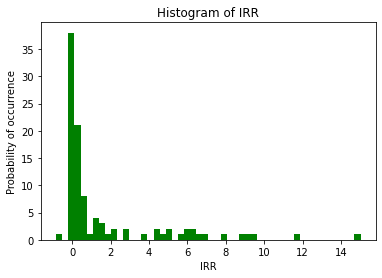

In [ ]:
print("Mean IRR", round(sp.mean(irr),2))
for i in range(10,100,10):
  print("percentile", i)
  print(round(sp.percentile(irr,i),2))
plt.hist(irr,50,facecolor='green',align='mid')
plt.xlabel('IRR')
plt.ylabel('Probability of occurrence')
plt.title('Histogram of IRR')
plt.show()

In [ ]:
sp.ones(n)

array([1., 1., 1., 1., 1., 1., 1., 1.])